# you are provided with a dataset containing information about houses, including features such as Number of Bedrooms, Square Footage, Location, Age of House, and Garage Size. The target variable is the Sale Price of the house.
# 1). Build a Gradient Boosting Regressor to predict the sale price of the houses.
# 2).  Split the dataset into training and testing sets (80-20 split).
# 3).  Perform hyperparameter tuning to find the best parameters for the Gradient Boosting model

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Softroniics/Tests/Test ML/Test of House_Prices.csv')

In [81]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900.0,3,3,3,Yes,East
124,125,147900,2160.0,4,3,3,Yes,NaN
125,126,113500,2070.0,2,2,2,No,North
126,127,149900,2020.0,3,3,1,No,West


In [82]:
df = df.rename(columns={'Neighborhood':'Location'})

In [83]:
df = df.drop(['Home','Offers','Brick'],axis=1)

In [84]:
df

,Price,SqFt,Bedrooms,Bathrooms,Location
0,114300,1790.0,2,2,East
1,114200,2030.0,4,2,East
2,114800,1740.0,3,2,East
3,94700,1980.0,3,2,East
4,119800,2130.0,3,3,East
...,...,...,...,...,...
123,119700,1900.0,3,3,East
124,147900,2160.0,4,3,NaN
125,113500,2070.0,2,2,North
126,149900,2020.0,3,3,West


In [85]:
df.shape

(128, 5)

In [86]:
df.dtypes

,0
Price,int64
SqFt,float64
Bedrooms,int64
Bathrooms,int64
Location,object


In [87]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms
count,128.000000,127.000000,128.000000,128.000000
mean,130427.343750,1997.716535,3.023438,2.445312
std,26868.770371,209.235908,0.725951,0.514492
min,69100.000000,1450.000000,2.000000,2.000000
25%,111325.000000,1880.000000,3.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000
75%,148250.000000,2140.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000


In [88]:
df.isnull().sum()

,0
Price,0
SqFt,1
Bedrooms,0
Bathrooms,0
Location,1


In [89]:
df['SqFt']=df['SqFt'].fillna(df['SqFt'].median())

In [90]:
df['Location']=df['Location'].fillna(df['Location'].mode().iloc[0])


In [91]:
df.isnull().sum()

,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Location,0


# EDA

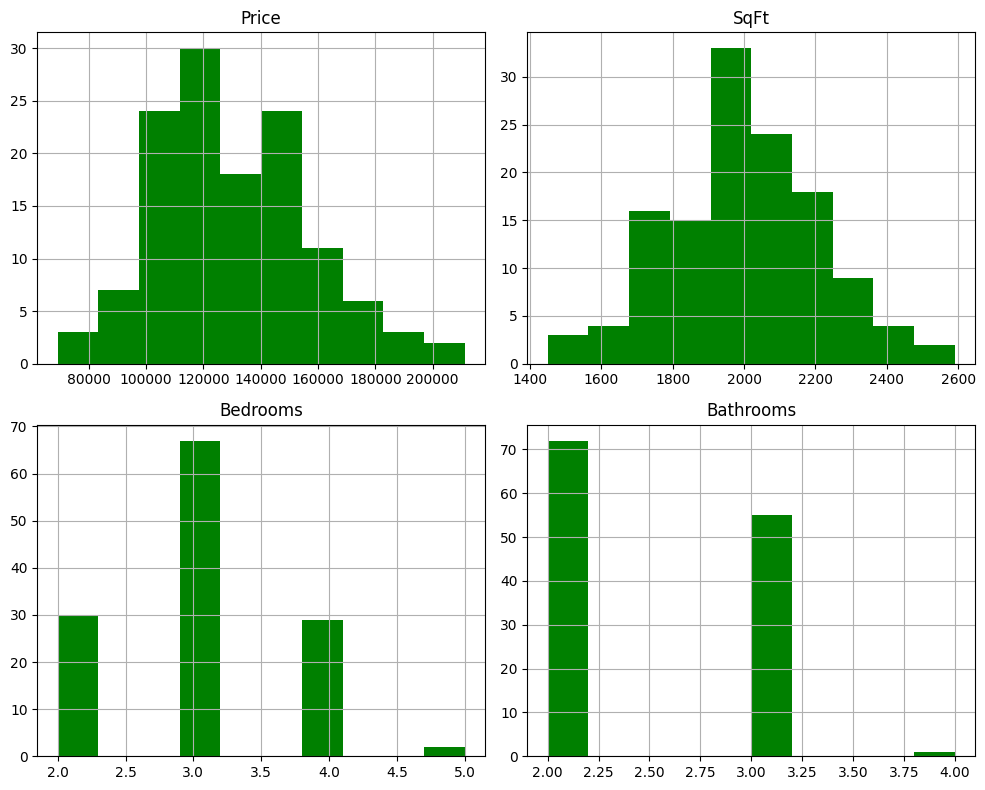

In [92]:
numerical_df = df.select_dtypes(include = 'number')
numerical_df.hist(figsize = (10,8), color = 'g')
plt.tight_layout()
plt.show()

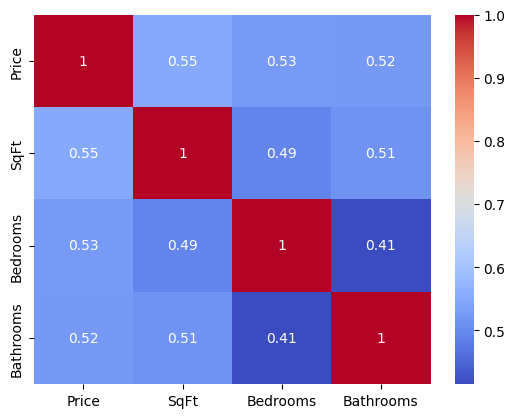

<Figure size 1400x1000 with 0 Axes>

In [93]:
sns.heatmap(numerical_df.corr(), annot = True, cmap='coolwarm')
plt.figure(figsize = (14,10))
plt.show()

In [94]:
# check & remove outerlayers

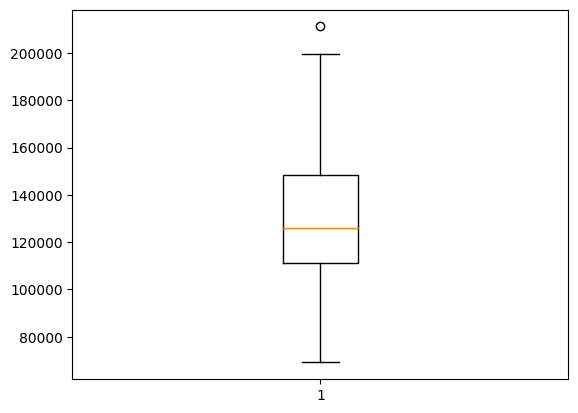

In [95]:
plt.boxplot(df['Price'])
plt.show()

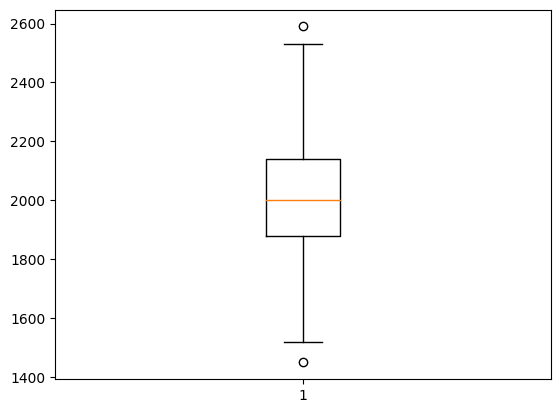

In [96]:

plt.boxplot(df['SqFt'])
plt.show()

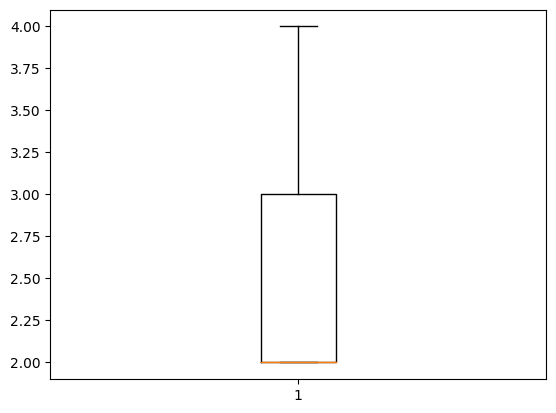

In [97]:
plt.boxplot(df['Bathrooms'])
plt.show()

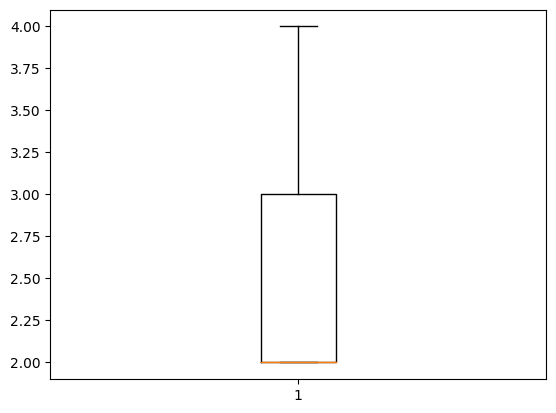

In [98]:
plt.boxplot(df['Bathrooms'])
plt.show()

In [99]:
def remove_outer(d,c):
  q1 = d[c].quantile(0.25)
  q2 = d[c].quantile(0.75)

  x = q2 - q1
  l = q1 - 1.5*x
  u = q2 + 1.5*x

  y = d[(d[c]>=l)&(d[c]<=u)]

  return y

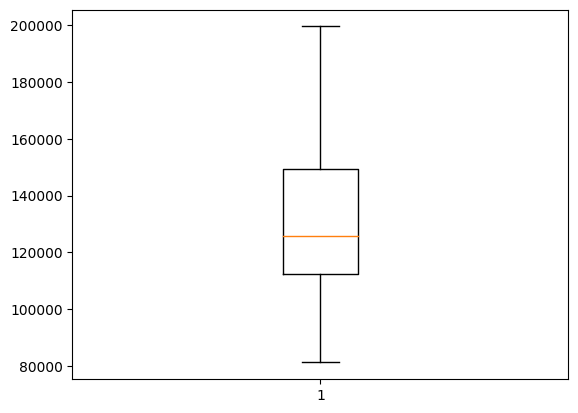

In [114]:
df=remove_outer(df,'Price')

plt.boxplot(df1['Price'])
plt.show()

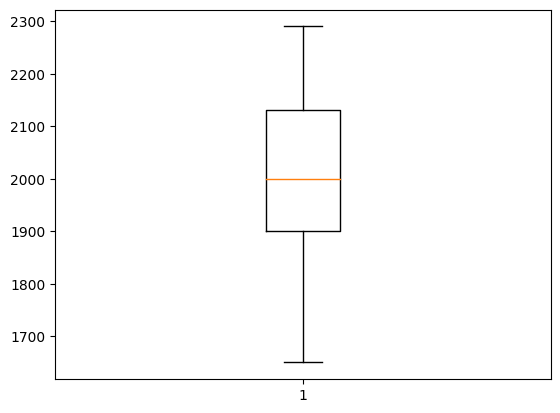

In [115]:
def remove_outer(d,c):
  q1 = d[c].quantile(0.25)
  q3 = d[c].quantile(0.75)

  x = q3 - q1
  l = q1 - 1*x
  u = q3 + 1*x

  y = d[(d[c]>=l)&(d[c]<=u)]

  return y

df=remove_outer(df,'SqFt')

plt.boxplot(df1['SqFt'])
plt.show()

# Splitting

In [117]:
# Encode categorical 'Location' feature
df['Location'] = pd.Categorical(df['Location']).codes

In [119]:
from sklearn.model_selection import train_test_split
x = df.drop(['Price'],axis=1)
y = df['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)

In [120]:
x_train

,SqFt,Bedrooms,Bathrooms,Location
71,2160.0,4,2,2
11,1870.0,2,2,0
39,1740.0,3,2,1
106,2130.0,3,2,1
104,1910.0,3,2,0
...,...,...,...,...
97,2000.0,2,2,0
117,1920.0,3,2,1
74,2140.0,3,3,2
25,2290.0,4,3,1


In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [122]:
x_train

array([[ 1.04798486,  1.44870681, -0.88561489,  1.26268375],
       [-0.80689914, -1.61716109, -0.88561489, -1.18208692],
       [-1.63839887, -0.08422714, -0.88561489,  0.04029842],
       [ 0.85610031, -0.08422714, -0.88561489,  0.04029842],
       [-0.55105307, -0.08422714, -0.88561489, -1.18208692],
       [-0.9987837 ,  1.44870681,  1.12915898,  1.26268375],
       [-0.42313004, -1.61716109, -0.88561489,  0.04029842],
       [-0.55105307, -1.61716109,  1.12915898, -1.18208692],
       [-1.12670673, -0.08422714, -0.88561489,  0.04029842],
       [ 1.36779245,  1.44870681,  1.12915898, -1.18208692],
       [ 0.60025424,  1.44870681, -0.88561489,  1.26268375],
       [ 0.72817728, -0.08422714, -0.88561489, -1.18208692],
       [ 0.02460058, -0.08422714, -0.88561489,  0.04029842],
       [ 0.02460058, -0.08422714,  1.12915898, -1.18208692],
       [-1.06274521, -0.08422714,  1.12915898,  1.26268375],
       [-0.10332245, -0.08422714, -0.88561489, -1.18208692],
       [-0.55105307, -0.

# modeling

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [124]:
# Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

In [126]:
# Define hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


In [133]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.score(x_train, y_train)

0.6316073299427887

In [130]:
# Get best parameters and train model
best_params = grid_search.best_params_
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(x_train, y_train)
best_gbr.score(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=5)

In [131]:
y_pred = best_gbr.predict(x_test)


In [132]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 262088379.75, MAE: 13395.60
